# Problem Set 3 CS129.18

The following problem set will revolve around the Enron Emails dataset.
The dataset `data/enron-data/` directory has 6 files. The objective is to build a classifier for whether email is spam or not.


## Requirements


>Spam or Ham?

Using the lessons on Naive Bayes and TF-IDF, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

**Using Enron 1 and 2**

1. How many Spam Emails are there? ( 1 pt )

2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body ( 7 pts )

3. Build a Naive Bayes classifier to classify whether emails are spam or not. ( 3 pts )

4. What is the longest ham email? ( 1 pt )

5. What is the accuracy of your model?( 1 pt )

6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? (7 pts)



-----


Bonus : Answer questions 1-6 using Enron 1,2, and 3. (5 pts)

----

In [163]:
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
import random

In [2]:
rootdir = "data/enron-data/enron1"
# Loop through all the directories, sub directories and files in the above folder, and print them.
for directories, subdirs, files in os.walk(rootdir):
    print(directories, subdirs, len(files))

data/enron-data/enron1 ['ham', 'spam'] 2
data/enron-data/enron1\ham ['.ipynb_checkpoints'] 3672
data/enron-data/enron1\ham\.ipynb_checkpoints [] 1
data/enron-data/enron1\spam [] 1499


In [3]:
ham_list = []
spam_list = []

# Same as before, but this time, read the files, and append them to the ham and spam list
for directories, subdirs, files in os.walk(rootdir):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list.append(data)
    
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam_list.append(data)


print(ham_list[0])
print(spam_list[0])

Subject: christmas tree farm pictures

Subject: dobmeos with hgh my energy level has gone up ! stukm
introducing
doctor - formulated
hgh
human growth hormone - also called hgh
is referred to in medical science as the master hormone . it is very plentiful
when we are young , but near the age of twenty - one our bodies begin to produce
less of it . by the time we are forty nearly everyone is deficient in hgh ,
and at eighty our production has normally diminished at least 90 - 95 % .
advantages of hgh :
- increased muscle strength
- loss in body fat
- increased bone density
- lower blood pressure
- quickens wound healing
- reduces cellulite
- improved vision
- wrinkle disappearance
- increased skin thickness texture
- increased energy levels
- improved sleep and emotional stability
- improved memory and mental alertness
- increased sexual potency
- resistance to common illness
- strengthened heart muscle
- controlled cholesterol
- controlled mood swings
- new hair growth and color restore

### 1. How many Spam Emails are there? ( 1 pt )

In [4]:
len(spam_list)

1499

In [5]:
len(ham_list)

3672

There are 1,499 spam emails.

### 2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body ( 7 pts )

In [197]:
import re

test_ham = ham_list.copy()
ham_split = []

for email in test_ham:
    email_split_list = email.split('\n')
    
    subject = email_split_list[0]
    subject_cleaned = subject.replace('Subject:', '').strip()
    
    body_list = email_split_list[1:-1]
    #Remove special characters from the body
    removetable = str.maketrans('', '', '#-,/.+|')
    body_cleaned = [s.translate(removetable) for s in body_list]
    body = ' '.join(body_cleaned)
    body = re.sub("\s+", " ", body.strip())

    ham_split.append(['ham', subject_cleaned, body])

In [198]:
ham_split[0:4]

[['ham', 'christmas tree farm pictures', ''],
 ['ham',
  'vastar resources , inc .',
  'gary production from the high island larger block a 1 2 commenced on saturday at 2 : 00 p m at about 6 500 gross carlos expects between 9 500 and 10 000 gross for tomorrow vastar owns 68 % of the gross production george x 3 6992 forwarded by george weissman hou ect on 12 13 99 10 : 16 am daren j farmer 12 10 99 10 : 38 am to : carlos j rodriguez hou ect @ ect cc : george weissman hou ect @ ect melissa graves hou ect @ ect subject : vastar resources inc carlos please call linda and get everything set up i \' m going to estimate 4 500 coming up tomorrow with a 2 000 increase each following day based on my conversations with bill fischer at bmar d forwarded by daren j farmer hou ect on 12 10 99 10 : 34 am enron north america corp from : george weissman 12 10 99 10 : 00 am to : daren j farmer hou ect @ ect cc : gary bryan hou ect @ ect melissa graves hou ect @ ect subject : vastar resources inc darren t

In [199]:
test_spam = spam_list.copy()
spam_split = []

for email in test_spam:
    email_split_list = email.split('\n')
    
    subject = email_split_list[0]
    subject_cleaned = subject.replace('Subject:', '').strip()
    
    body_list = email_split_list[1:-1]
    #Remove special characters from the body
    removetable = str.maketrans('', '', '#-,/.+|')
    body_cleaned = [s.translate(removetable) for s in body_list]
    body = ' '.join(body_cleaned)
    body = re.sub("\s+", " ", body.strip())

    spam_split.append(['spam', subject_cleaned, body])

In [200]:
spam_split[0:4]

[['spam',
  'dobmeos with hgh my energy level has gone up ! stukm',
  'introducing doctor formulated hgh human growth hormone also called hgh is referred to in medical science as the master hormone it is very plentiful when we are young but near the age of twenty one our bodies begin to produce less of it by the time we are forty nearly everyone is deficient in hgh and at eighty our production has normally diminished at least 90 95 % advantages of hgh : increased muscle strength loss in body fat increased bone density lower blood pressure quickens wound healing reduces cellulite improved vision wrinkle disappearance increased skin thickness texture increased energy levels improved sleep and emotional stability improved memory and mental alertness increased sexual potency resistance to common illness strengthened heart muscle controlled cholesterol controlled mood swings new hair growth and color restore read more at this website unsubscribe'],
 ['spam',
  'your prescription is ready . 

In [201]:
spam_n_ham = ham_split + spam_split

from pandas import DataFrame

columns = ['Status', 'Subject', 'Body']

df_combined = DataFrame (spam_n_ham, columns = columns)
df_combined.head()

,Status,Subject,Body
0,ham,christmas tree farm pictures,
1,ham,"vastar resources , inc .",gary production from the high island larger bl...
2,ham,calpine daily gas nomination,
3,ham,re : issue,fyi see note below already done stella forward...
4,ham,meter 7268 nov allocation,fyi forwarded by lauri a allen hou ect on 12 1...


In [202]:
df_combined.tail()

,Status,Subject,Body
5166,spam,our pro - forma invoice attached,divide cover most gave trip until energy own v...
5167,spam,str _ rndlen ( 2 - 4 ) } { extra _ time _ 4 } ...,
5168,spam,check me out !,61 bb hey derm bbbbb check out paris and many ...
5169,spam,hot jobs,global marketing specialties po box 300 east a...
5170,spam,save up to 89 % on ink + no shipping cost,save up to 89 % on inkjet laser copier supplie...


### 3. Build a Naive Bayes classifier to classify whether emails are spam or not. ( 3 pts )

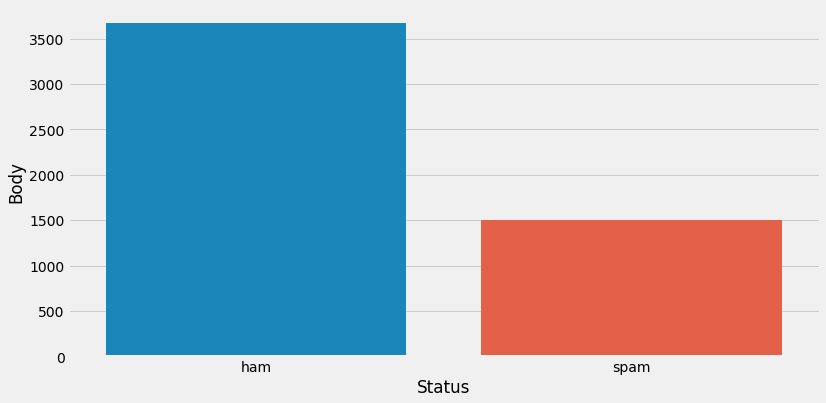

In [137]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))

df_2 = df_combined.groupby('Status').count()
df_2.reset_index(inplace=True)
sns.barplot(x='Status', y='Body', data=df_2);

### In building the classifier, only the body of the email will be used in this section.

In [203]:
train_x, test_x, train_y, test_y = train_test_split(df_combined["Body"], df_combined["Status"], test_size=0.3,random_state=109)

In [204]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_x = vectorizer.fit_transform(train_x)

In [205]:
index_value={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
fully_indexed = []
for row in tfidf_train_x:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

In [206]:
fully_indexed[0]

{'port': 0.08053712708027973,
 'offices': 0.08358332096316343,
 'registered': 0.06731760389033013,
 '1658245': 0.1006159592609337,
 '1239190': 0.1006159592609337,
 'number': 0.0947606218499859,
 'company': 0.14854268024604336,
 'held': 0.07062579150180026,
 'represent': 0.07194863118442453,
 'personal': 0.06707673009883315,
 'expressed': 0.08053712708027973,
 'view': 0.1305929467126799,
 'delete': 0.07864794008100752,
 'immediately': 0.06593559802184099,
 'sender': 0.1689447776297825,
 'notify': 0.07001203871424055,
 'error': 0.06093090878320907,
 'received': 0.05276148577078907,
 'transmission': 0.07752667905289273,
 'unlawful': 0.0977404483056988,
 'disclosure': 0.08358332096316343,
 'copying': 0.08880829544019321,
 'use': 0.04834724229242968,
 'unauthorised': 0.1006159592609337,
 'authorisation': 0.1006159592609337,
 'message': 0.12886796919694227,
 'disclose': 0.08645883191839833,
 'recipient': 0.08542737175992024,
 'confidential': 0.07194863118442453,
 'treated': 0.079247414337861

In [207]:
classifier = GaussianNB()
classifier.fit(tfidf_train_x.toarray(), train_y)

GaussianNB()

In [208]:
tfidf_test_x = vectorizer.transform(test_x)
print(tfidf_test_x.shape)
scores = cross_val_score(classifier, tfidf_test_x.toarray(), test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

pred = classifier.predict(tfidf_test_x.toarray())
print(metrics.classification_report(test_y, pred))

(1552, 39856)
Accuracy: 92.46 percent
              precision    recall  f1-score   support

         ham       0.93      0.97      0.95      1118
        spam       0.91      0.82      0.86       434

    accuracy                           0.93      1552
   macro avg       0.92      0.90      0.91      1552
weighted avg       0.93      0.93      0.93      1552



In [209]:
mess = ['We have a meeting for tomorrow', "You won the lottery, claim it now!!!", 
        "Your bank account has been locked. Please login at http://goo.gl/23", 
        "It's your last day to claim this FREE ticket to the Bahamas!",
       "I love you", "BDO E-receipt [DO NOT REPLY]", "You have received 2 Bitcoins! Please confirm transaction."]
output = classifier.predict(vectorizer.transform(mess).toarray())

for i ,m in enumerate(mess):
    print(m, ' == ', output[i])

We have a meeting for tomorrow  ==  ham
You won the lottery, claim it now!!!  ==  spam
Your bank account has been locked. Please login at http://goo.gl/23  ==  spam
It's your last day to claim this FREE ticket to the Bahamas!  ==  ham
I love you  ==  ham
BDO E-receipt [DO NOT REPLY]  ==  ham
You have received 2 Bitcoins! Please confirm transaction.  ==  ham


It is observed that although the model may has attained an accuracy score of more than 90%, when tested using some sample messags, it
predicted wrongly. This may be the case if the model is overfitted or the data may be imbalanced.

### 4. What is the longest ham email? ( 1 pt )

In [210]:
df_ham = df_combined[df_combined["Status"] == 'ham']
df_ham.head()

,Status,Subject,Body
0,ham,christmas tree farm pictures,
1,ham,"vastar resources , inc .",gary production from the high island larger bl...
2,ham,calpine daily gas nomination,
3,ham,re : issue,fyi see note below already done stella forward...
4,ham,meter 7268 nov allocation,fyi forwarded by lauri a allen hou ect on 12 1...


In [211]:
df_ham["Body Length"] = df_ham["Body"].str.len()
df_ham.head()

,Status,Subject,Body,Body Length
0,ham,christmas tree farm pictures,,0
1,ham,"vastar resources , inc .",gary production from the high island larger bl...,2064
2,ham,calpine daily gas nomination,,0
3,ham,re : issue,fyi see note below already done stella forward...,809
4,ham,meter 7268 nov allocation,fyi forwarded by lauri a allen hou ect on 12 1...,845


In [212]:
df_ham.iloc[df_ham["Body Length"].idxmax()]

Status                                                       ham
Subject                        fw : " red , white and blue out "
Body           original message from : carter rhonda [ mailto...
Body Length                                                29250
Name: 3488, dtype: object

### 5. What is the accuracy of your model?( 1 pt )

In [213]:
print(f'From the previous number, the attained accuracy score after cross validation of the classifier was {acc*100} percent.')

From the previous number, the attained accuracy score after cross validation of the classifier was 92.46136292915672 percent.


### 6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? (7 pts)

In [214]:
df_combined.head()

,Status,Subject,Body
0,ham,christmas tree farm pictures,
1,ham,"vastar resources , inc .",gary production from the high island larger bl...
2,ham,calpine daily gas nomination,
3,ham,re : issue,fyi see note below already done stella forward...
4,ham,meter 7268 nov allocation,fyi forwarded by lauri a allen hou ect on 12 1...


In [215]:
df_combined["Subject-Body"] = df_combined["Subject"] + ' ' + df_combined["Body"]
df_combined.head()

,Status,Subject,Body,Subject-Body
0,ham,christmas tree farm pictures,,christmas tree farm pictures
1,ham,"vastar resources , inc .",gary production from the high island larger bl...,"vastar resources , inc . gary production from ..."
2,ham,calpine daily gas nomination,,calpine daily gas nomination
3,ham,re : issue,fyi see note below already done stella forward...,re : issue fyi see note below already done ste...
4,ham,meter 7268 nov allocation,fyi forwarded by lauri a allen hou ect on 12 1...,meter 7268 nov allocation fyi forwarded by lau...


In [216]:
train_x, test_x, train_y, test_y = train_test_split(df_combined["Subject-Body"], df_combined["Status"], test_size=0.3,random_state=109)

In [217]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_x = vectorizer.fit_transform(train_x)

In [218]:
classifier = GaussianNB()
classifier.fit(tfidf_train_x.toarray(), train_y)

GaussianNB()

In [219]:
tfidf_test_x = vectorizer.transform(test_x)
print(tfidf_test_x.shape)
scores = cross_val_score(classifier, tfidf_test_x.toarray(), test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

pred = classifier.predict(tfidf_test_x.toarray())
print(metrics.classification_report(test_y, pred))

(1552, 40554)
Accuracy: 94.14 percent
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97      1118
        spam       0.92      0.91      0.91       434

    accuracy                           0.95      1552
   macro avg       0.94      0.94      0.94      1552
weighted avg       0.95      0.95      0.95      1552



In [220]:
mess = ['We have a meeting for tomorrow', "You won the lottery, claim it now!!!", 
        "Your bank account has been locked. Please login at http://goo.gl/23", 
        "It's your last day to claim this FREE ticket to the Bahamas!",
       "I love you", "BDO E-receipt [DO NOT REPLY]", "You have received 2 Bitcoins! Please confirm transaction."]
output = classifier.predict(vectorizer.transform(mess).toarray())

for i ,m in enumerate(mess):
    print(m, ' == ', output[i])

We have a meeting for tomorrow  ==  ham
You won the lottery, claim it now!!!  ==  spam
Your bank account has been locked. Please login at http://goo.gl/23  ==  spam
It's your last day to claim this FREE ticket to the Bahamas!  ==  ham
I love you  ==  ham
BDO E-receipt [DO NOT REPLY]  ==  ham
You have received 2 Bitcoins! Please confirm transaction.  ==  ham


Although the accuracy score for the model has slightly increased (~2% higher than the classifier not using the subject text),
it has been observed that some emails are still tagged as ham even if they are spam emails. I believe this has to do with the
imbalanced data set. Therefore, adding more spam emails as training data will aid in optimizing the model.